# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [25]:
# Your code here
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.datasets import load_boston

boston=load_boston()
boston

feature = pd.DataFrame(boston.data,columns=boston.feature_names).drop("B",axis=1)
target = pd.DataFrame(boston.target, columns = ["labels"])
data = pd.concat([feature,target], axis =1)
data.head()

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,labels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [26]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
labels     0
dtype: int64

In [27]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
labels     float64
dtype: object

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/779164970.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


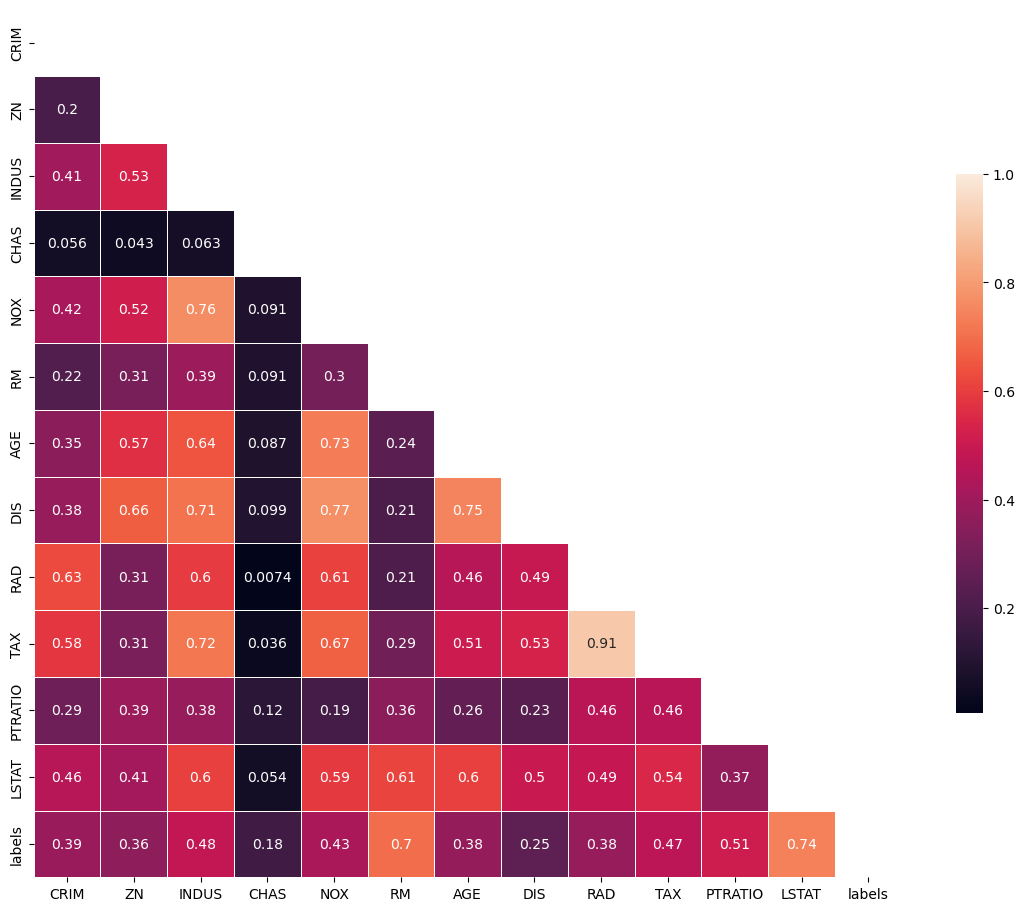

In [28]:
# Your plots here
corr=np.abs(data.corr())
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/72411350.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


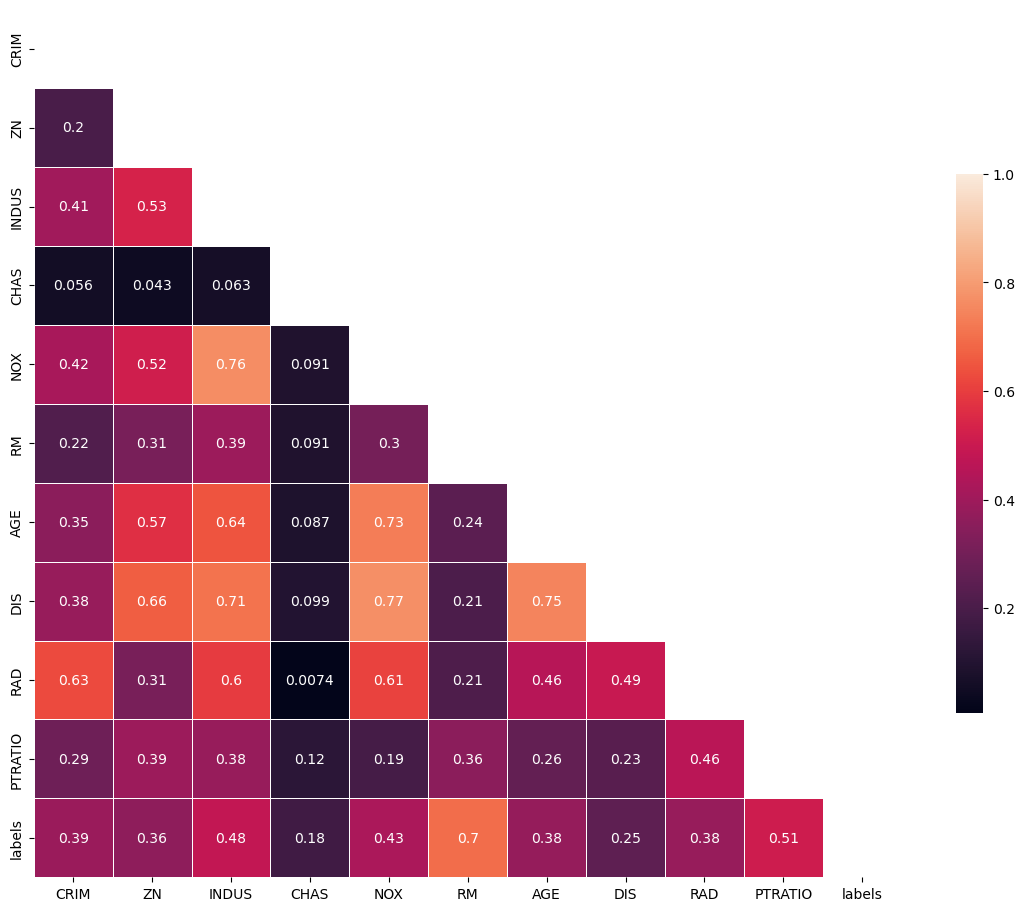

In [29]:
data.drop(columns=["LSTAT","TAX"], inplace=True)

# Your plots here
corr=np.abs(data.corr())
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/615163348.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


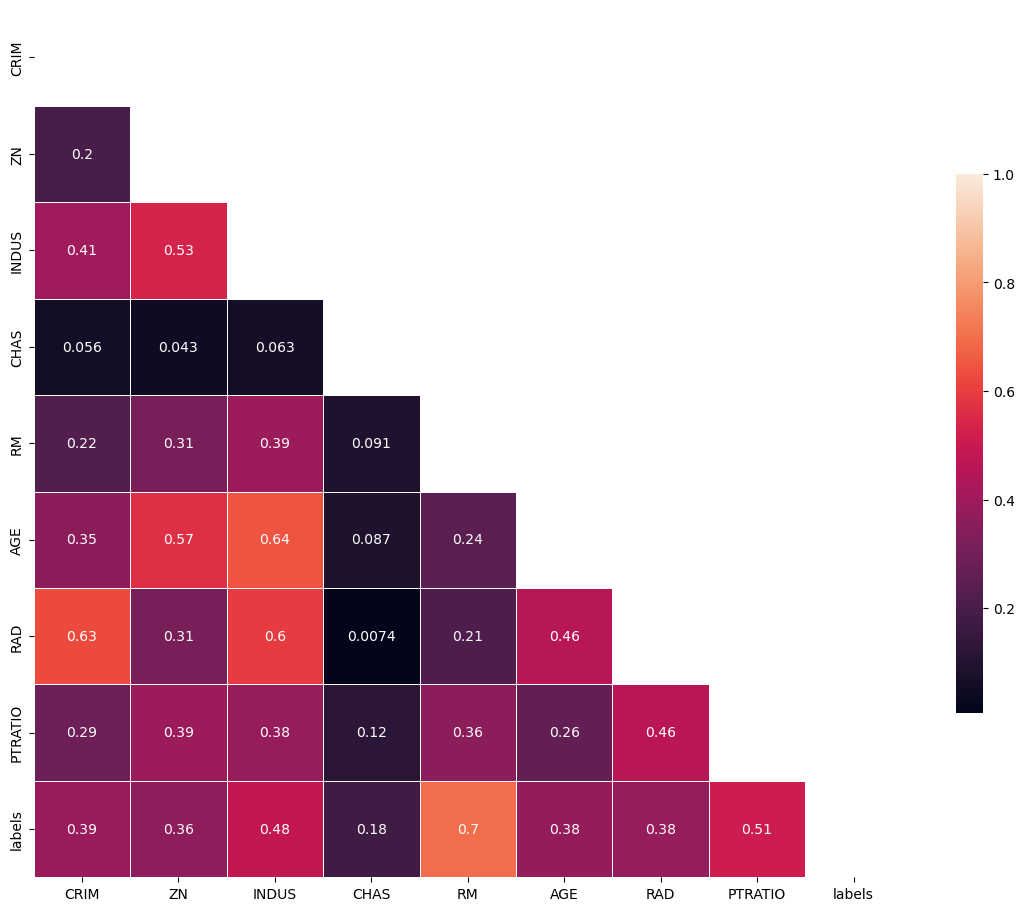

In [30]:
data.drop(columns=["DIS","NOX"], inplace=True)

# Your plots here
corr=np.abs(data.corr())
#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

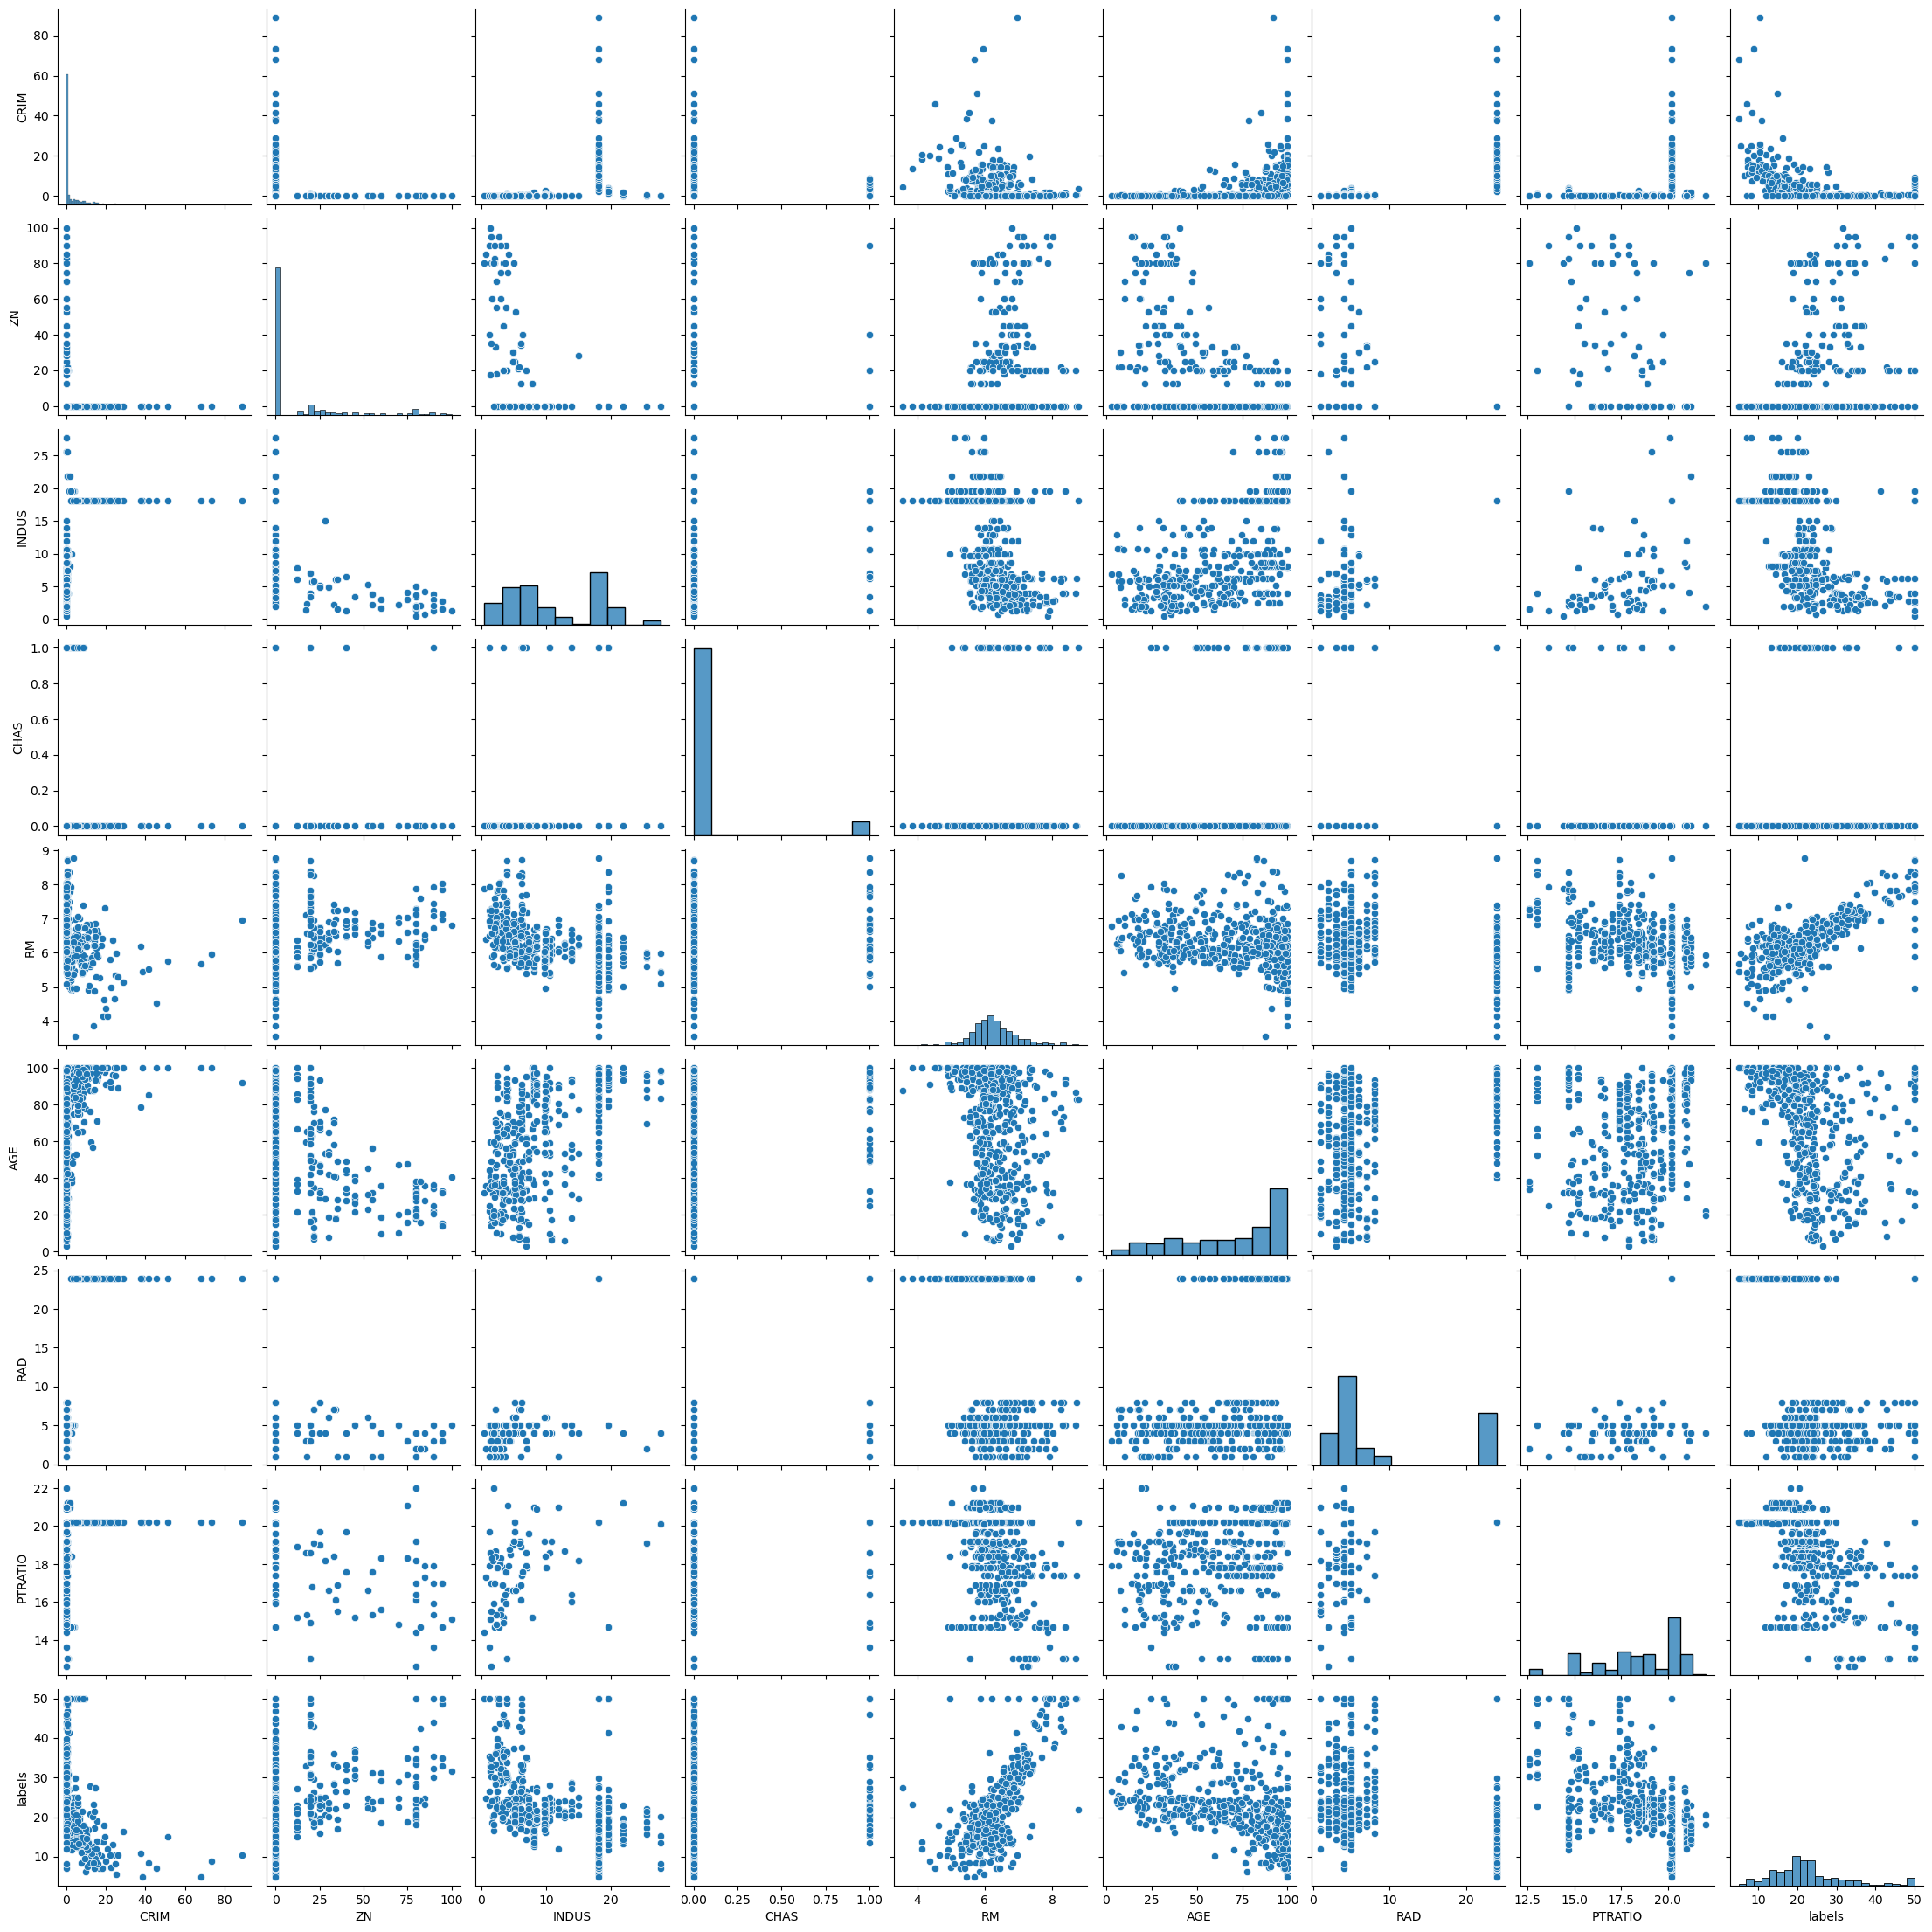

In [33]:
sn.pairplot(data)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [34]:
# Your response here
#The one that shows a clearer linear relationship is RM

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [35]:
# Your response here
#Already did it above

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [36]:
# Your code here
data["labels"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: labels, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [38]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    return r2
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [42]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [49]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

trees=[]
for i in [2,4,6,8,10]:
    tree_results={}
    forest=RandomForestRegressor(n_estimators=100,
                            max_depth=i,
                            random_state=1)
    forest.fit(X_train,y_train)
    score_test= forest.score(X_test,y_test)
    score_train= forest.score(X_train,y_train)
    tree_results[i]=(score_test,score_train)
    trees.append(tree_results)
    
trees


/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/813273279.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/813273279.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/813273279.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/813273279.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

[{2: (0.6646786511460496, 0.7998032382890501)},
 {4: (0.778773047660683, 0.928248904751178)},
 {6: (0.7886102585152059, 0.9654599023784987)},
 {8: (0.7927772576918164, 0.9794106625188245)},
 {10: (0.7964781671099456, 0.9838813836011702)}]

Now, plot the score for each tree on the training set and on the testing set.

In [50]:
# Produce a plot with the score for the testing and training for the different max depths
print("did it above")

did it above


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [52]:
# Your response here
print("As the max depth increases, the test score increases but so does the train score, meaning the model is becoming more and more overfitted")

As the max depth increases, the test score increases but so does the train score, meaning the model is becoming more and more overfitted


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [53]:
#It suffers of high bias and low variance and it's probably underfited
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/1353623720.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/1353623720.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/1353623720.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/1353623720.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

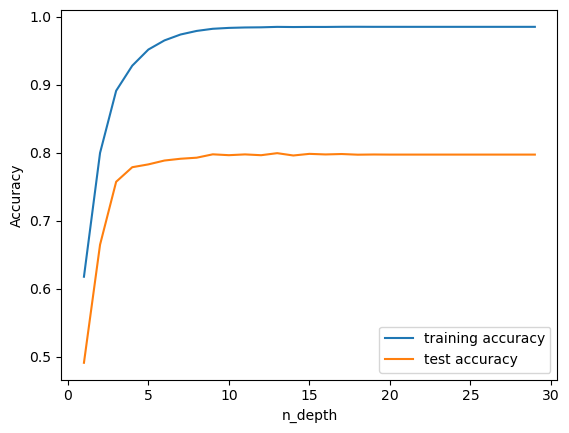

In [55]:
# Your response here
max_depth = range(1,30)
test = []
train = []
for depth in max_depth:
  model = RandomForestRegressor(n_estimators=100,
                            max_depth=depth,
                            random_state=1)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))
  # we quickly see overfitting properties
plt.plot(max_depth,train, label="training accuracy")
plt.plot(max_depth,test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [59]:
from sklearn.model_selection import GridSearchCV
#number of trees in random forest
n_estimators=[10,100,500,1000]
#maximum number of depth (levels) in each tree
max_depth = [2,4,6,8,10]
grid={"n_estimators":n_estimators,
     "max_depth":max_depth}
forest = RandomForestRegressor()
grid_search=GridSearchCV(estimator = forest, param_grid=grid, cv=5)
grid_search.fit(X_train,y_train)
grid_search.best_params_

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages

/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/leonordraiblate/opt/anaconda3/lib/python3.9/site-packages

{'max_depth': 10, 'n_estimators': 500}

In [64]:
#From the graph
forest=RandomForestRegressor(n_estimators=100,
                            max_depth=2,
                            random_state=1)
forest.fit(X_train,y_train)
score_test= forest.score(X_test,y_test)
score_train= forest.score(X_train,y_train)

print("The test score is ", score_test)
print("The training score is ", score_train)

The test score is  0.6646786511460496
The training score is  0.7998032382890501


/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/245991084.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


In [66]:
#From the hyperparameter tunning
forest=RandomForestRegressor(n_estimators=500,
                            max_depth=10,
                            random_state=1)
forest.fit(X_train,y_train)
score_test= forest.score(X_test,y_test)
score_train= forest.score(X_train,y_train)

print("The test score is ", score_test)
print("The training score is ", score_train)
#Overfit problem

/var/folders/5x/3x2kb92547q1q0l2kcqv0fpr0000gn/T/ipykernel_69242/3396820224.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


The test score is  0.7999881510205306
The training score is  0.9834118933104913


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here